In [43]:
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from os import listdir
import glob
import datetime
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

In [21]:
tashuData16 = pd.read_csv('./Data/2016.csv', encoding='CP949')
tashuData17 = pd.read_csv('./Data/2017.csv')
tashuData18 = pd.read_csv('./Data/2018.csv')

In [22]:
tashuData16.head()

,대여스테이션,대여일시,반납스테이션,반납일시,이동거리,회원구분
0,46,20160101050015,17.0,20160101050451,380.0,0
1,152,20160101050629,82.0,20160101053753,3190.0,2
2,133,20160101052416,172.0,20160101055647,2070.0,2
3,133,20160101052919,172.0,20160101055734,2080.0,2
4,39,20160101053244,57.0,20160101054033,860.0,0


In [23]:
tashuData = pd.merge(tashuData16,tashuData17, how='outer')
tashuData = pd.merge(tashuData,tashuData18, how='outer')

In [24]:
tashuData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1821045 entries, 0 to 1821044
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   대여스테이션  float64
 1   대여일시    int64  
 2   반납스테이션  float64
 3   반납일시    int64  
 4   이동거리    float64
 5   회원구분    int64  
dtypes: float64(3), int64(3)
memory usage: 97.3 MB


In [25]:
tashuData= tashuData.rename({'대여스테이션':'Rental_Stataion',
                     '대여일시':'Rental_Date',
                     '반납스테이션':'Return_Station',
                     '반납일시':'Retrun_Date',
                     '이동거리':'Travel_distance',
                     '회원구분':'Member_Classification'}, axis='columns')

In [26]:
del tashuData['Travel_distance']
del tashuData['Member_Classification']
tashuData = tashuData.fillna('0')

In [27]:
tashuData.head()

,Rental_Stataion,Rental_Date,Return_Station,Retrun_Date
0,46,20160101050015,17,20160101050451
1,152,20160101050629,82,20160101053753
2,133,20160101052416,172,20160101055647
3,133,20160101052919,172,20160101055734
4,39,20160101053244,57,20160101054033


In [9]:
weatherData16 = pd.read_csv('./Data/weather2016.csv', encoding='CP949')
weatherData17 = pd.read_csv('./Data/weather2017.csv', encoding='CP949')
weatherData18 = pd.read_csv('./Data/weather2018.csv', encoding='CP949')

In [10]:
weatherData = pd.merge(weatherData16,weatherData17, how='outer')
weatherData = pd.merge(weatherData,weatherData18, how='outer')

In [11]:
del weatherData['지점명']
del weatherData['지점']

weatherData.rename(columns= {'일시':'TIME',
                          '기온(°C)': 'TEMPERATURE',
                          '강수량(mm)' :'RAINFALL',
                          '풍속(m/s)' : 'WINDSPEED',
                          '습도(%)' :'HUMLDITY',
                          '적설(cm)' : 'SNOWFALL',
                             }, inplace=True)

In [12]:
def get_new_date(date):
    prpr = {
        '-' : '',
        ':' : '',
        ' ' : '',
    }
    
    for key, value in prpr.items():
        date = date.replace(key, value)
    return date

weatherData.TIME = weatherData.TIME.apply(get_new_date)
weatherData = weatherData.fillna('0')
weatherData.head()

,TIME,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY,SNOWFALL
0,201601010100,-2.4,0,1.1,93,0
1,201601010200,-2.8,0,0.6,93,0
2,201601010300,-3.0,0,0.9,94,0
3,201601010400,-3.2,0,0.8,95,0
4,201601010500,-3.6,0,0.7,95,0


In [28]:
tashuData.head()

,Rental_Stataion,Rental_Date,Return_Station,Retrun_Date
0,46,20160101050015,17,20160101050451
1,152,20160101050629,82,20160101053753
2,133,20160101052416,172,20160101055647
3,133,20160101052919,172,20160101055734
4,39,20160101053244,57,20160101054033


In [29]:
rentTashu = tashuData[['Rental_Stataion', 'Rental_Date']]
rentTashu.rename(columns= {'대여 스테이션 정보': 'STATION',
                             }, inplace=True)

rentTashu['TimeDate'] = rentTashu['Rental_Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d%H%M%S'))
rentTashu['YEAR'] = rentTashu['TimeDate'].dt.strftime('%Y').astype('object')
rentTashu['MONTH'] = rentTashu['TimeDate'].dt.strftime('%m').astype('object')
rentTashu['DAY'] = rentTashu['TimeDate'].dt.strftime('%d').astype('object')
rentTashu['HOUR'] = rentTashu['TimeDate'].dt.strftime('%H').astype('object')
rentTashu['WEEKDAY'] = rentTashu['TimeDate'].dt.weekday.astype('object')
rentTashu['Rental_Date'] = rentTashu['YEAR'] + rentTashu['MONTH'] + rentTashu['DAY'] + rentTashu['HOUR'] + '00'

In [30]:
rentTashu.head()

,Rental_Stataion,Rental_Date,TimeDate,YEAR,MONTH,DAY,HOUR,WEEKDAY
0,46,201601010500,2016-01-01 05:00:15,2016,01,01,05,4
1,152,201601010500,2016-01-01 05:06:29,2016,01,01,05,4
2,133,201601010500,2016-01-01 05:24:16,2016,01,01,05,4
3,133,201601010500,2016-01-01 05:29:19,2016,01,01,05,4
4,39,201601010500,2016-01-01 05:32:44,2016,01,01,05,4


In [205]:
def season(month):
    prpr = {
        '01': '3',
        '02': '3',
        '03': '0',
        '04': '0',
        '05': '0',
        '06': '1',
        '07': '1',
        '08': '1',
        '09': '2',
        '10': '2',
        '11': '2',
        '12': '3',
    }
    for key, value in prpr.items():
        month = month.replace(key, value)
    return month


In [ ]:

rentTashu['SEASON'] = rentTashu['MONTH'].apply(season)
rentTashu['RENTCOUNT'] = 1

In [49]:
rentTashu.head()

,Rental_Stataion,Rental_Date,TimeDate,YEAR,MONTH,DAY,HOUR,WEEKDAY,SEASON,RENTCOUNT
0,46,201601010500,2016-01-01 05:00:15,2016,01,01,05,4,3,1
1,152,201601010500,2016-01-01 05:06:29,2016,01,01,05,4,3,1
2,133,201601010500,2016-01-01 05:24:16,2016,01,01,05,4,3,1
3,133,201601010500,2016-01-01 05:29:19,2016,01,01,05,4,3,1
4,39,201601010500,2016-01-01 05:32:44,2016,01,01,05,4,3,1


In [50]:
rtTashu = rentTashu.groupby([rentTashu['Rental_Stataion'],rentTashu['Rental_Date'],rentTashu['YEAR'],rentTashu['MONTH'],rentTashu['DAY'],rentTashu['HOUR'],rentTashu['WEEKDAY'],rentTashu['SEASON']], as_index=False).count()
del rtTashu['TimeDate']
rtTashu.rename(columns={'Rental_Stataion':'Station',
                       'Rental_Date':'TIME'}, inplace=True)
rtTashu.astype('object')
rtTashu.head()

,Station,TIME,YEAR,MONTH,DAY,HOUR,WEEKDAY,SEASON,RENTCOUNT
0,1,201601010800,2016,01,01,08,4,3,1
1,1,201601011400,2016,01,01,14,4,3,2
2,1,201601011500,2016,01,01,15,4,3,1
3,1,201601011600,2016,01,01,16,4,3,3
4,1,201601011800,2016,01,01,18,4,3,1


In [51]:
totalRent= pd.merge(rtTashu,weatherData, how='outer')
totalRent.head()

,Station,TIME,YEAR,MONTH,DAY,HOUR,WEEKDAY,SEASON,RENTCOUNT,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY,SNOWFALL
0,1,201601010800,2016,01,01,08,4.0,3,1.0,-3.2,0,0.8,95.0,0
1,10,201601010800,2016,01,01,08,4.0,3,1.0,-3.2,0,0.8,95.0,0
2,12,201601010800,2016,01,01,08,4.0,3,5.0,-3.2,0,0.8,95.0,0
3,15,201601010800,2016,01,01,08,4.0,3,2.0,-3.2,0,0.8,95.0,0
4,17,201601010800,2016,01,01,08,4.0,3,1.0,-3.2,0,0.8,95.0,0


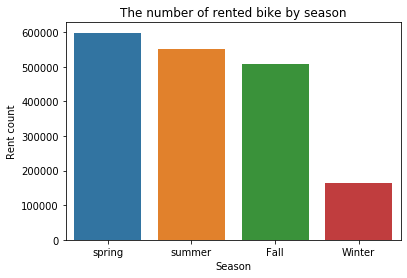

In [52]:
group_season = totalRent.groupby(['SEASON'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_season['SEASON'], y =group_season['RENTCOUNT'])
ax.set(xlabel='Season', ylabel='Rent count')
season = ['spring', 'summer', 'Fall', 'Winter']
plt.xticks(np.arange(4), season)
plt.title('The number of rented bike by season')
plt.show()

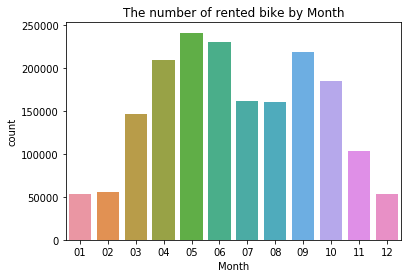

In [69]:
group_mn = totalRent.groupby(['MONTH'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_mn['MONTH'], y = group_mn['RENTCOUNT'])
ax.set(xlabel='Month', ylabel='count')
plt.title('The number of rented bike by Month')
plt.show()

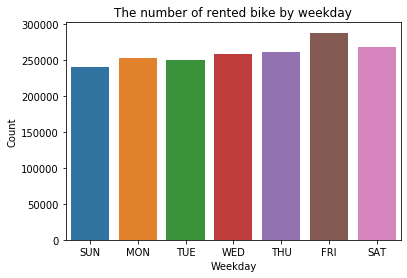

In [70]:
group_weekday = totalRent.groupby(['WEEKDAY'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_weekday['WEEKDAY'], y=group_weekday['RENTCOUNT'])
ax.set(xlabel='Weekday', ylabel='Count')
weekday = ['SUN', 'MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT']
plt.xticks(np.arange(7), weekday)
plt.title('The number of rented bike by weekday')
plt.show()

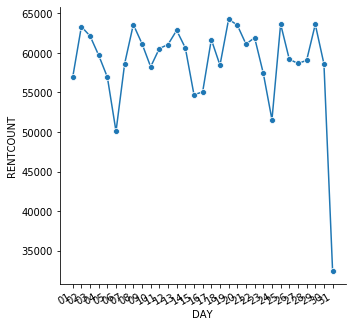

In [78]:
group_hr = totalRent.groupby(['DAY'])['RENTCOUNT'].sum().reset_index()
g = sns.relplot(x="DAY", y="RENTCOUNT", kind="line", data=group_hr, marker='o')
g.fig.autofmt_xdate()

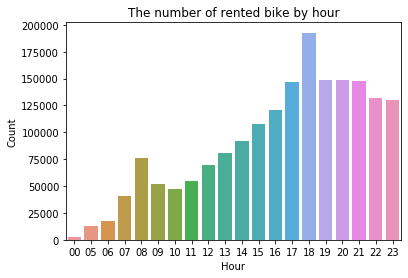

In [72]:
group_hr = totalRent.groupby(['HOUR'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_hr['HOUR'], y=group_hr['RENTCOUNT'])
ax.set(xlabel='Hour', ylabel='Count')
plt.title('The number of rented bike by hour')
plt.show()

In [87]:
tashuData.head()

,Rental_Stataion,Rental_Date,Return_Station,Retrun_Date
0,46,20160101050015,17,20160101050451
1,152,20160101050629,82,20160101053753
2,133,20160101052416,172,20160101055647
3,133,20160101052919,172,20160101055734
4,39,20160101053244,57,20160101054033


In [191]:
route = tashuData.groupby([tashuData['Rental_Stataion'], tashuData['Return_Station']]).count()
Top10Rental = route .nlargest(10,'Rental_Date')
del Top10Rental['Retrun_Date']

Top10Rental.rename(columns= {
                             'Rental_Date':'Count',
                             }, inplace=True)
Top10Rental = Top10Rental.reset_index()

In [192]:
Top10Rental

,Rental_Stataion,Return_Station,Count
0,3,3,27424
1,186,186,18809
2,21,105,9158
3,31,31,8639
4,186,3,7833
5,3,186,7244
6,56,56,6394
7,107,105,4851
8,33,33,4453
9,200,178,4396


In [193]:
station00 = station[['번호','명칭']]
station00.rename(columns={'번호':'Rental_Stataion',
                         '명칭':'Rental_Station_Name'}, inplace=True)

Top10Rental = pd.merge(Top10Rental, station00, on='Rental_Stataion')

In [194]:
station00.rename(columns={'Rental_Stataion':'Return_Station',
                         'Rental_Station_Name':'Return_Station_Name'}, inplace=True)

Top10Rental = pd.merge(Top10Rental, station00, on='Return_Station')

In [195]:
newStation = {"Rental_Stataion": ['186', '186', '3','200'], "Return_Station": ['186', '3','186', '178'], "Count": ['18809', '7833', '7244', '4396'], "Rental_Station_Name": ['한밭수목원2', '한밭수목원2', '한밭수목원1', '.지족역 2번출구(건너편)'], "Return_Station_Name": ['한밭수목원2', '한밭수목원(정문입구)','한밭수목원2', '노은역 3번출구']}
newStation = pd.DataFrame(newStation)
Top10Rental =Top10Rental.astype('object')
newStation

,Rental_Stataion,Return_Station,Count,Rental_Station_Name,Return_Station_Name
0,186,186,18809,한밭수목원2,한밭수목원2
1,186,3,7833,한밭수목원2,한밭수목원(정문입구)
2,3,186,7244,한밭수목원1,한밭수목원2
3,200,178,4396,.지족역 2번출구(건너편),노은역 3번출구


In [196]:
Top10 = pd.merge(Top10Rental, newStation, how='outer')
Top10

,Rental_Stataion,Return_Station,Count,Rental_Station_Name,Return_Station_Name
0,3.0,3.0,27424.0,한밭수목원(정문입구),한밭수목원(정문입구)
1,21.0,105.0,9158.0,카이스트 학사식당 앞,카이스트 서쪽 쪽문
2,107.0,105.0,4851.0,카이스트 세종관,카이스트 서쪽 쪽문
3,31.0,31.0,8639.0,유성구청,유성구청
4,56.0,56.0,6394.0,충대정문(장대네거리),충대정문(장대네거리)
5,33.0,33.0,4453.0,월평역,월평역
6,186.0,186.0,18809.0,한밭수목원2,한밭수목원2
7,186.0,3.0,7833.0,한밭수목원2,한밭수목원(정문입구)
8,3.0,186.0,7244.0,한밭수목원1,한밭수목원2
9,200.0,178.0,4396.0,.지족역 2번출구(건너편),노은역 3번출구


## Train & Predict

In [202]:
tashuData19 = pd.read_csv('./Data/2019.csv')

tashuData19= tashuData19.rename({'대여스테이션':'Rental_Stataion',
                     '대여일시':'Rental_Date',
                     '반납스테이션':'Return_Station',
                     '반납일시':'Retrun_Date',
                     '이동거리':'Travel_distance',
                     '회원구분':'Member_Classification'}, axis='columns')

del tashuData19['Travel_distance']
del tashuData19['Member_Classification']
tashuData19 = tashuData19.fillna('0')


weatherData19 = pd.read_csv('./Data/weather2019.csv', encoding='CP949')
del weatherData19['지점명']
del weatherData19['지점']

weatherData19.rename(columns= {'일시':'TIME',
                          '기온(°C)': 'TEMPERATURE',
                          '강수량(mm)' :'RAINFALL',
                          '풍속(m/s)' : 'WINDSPEED',
                          '습도(%)' :'HUMLDITY',
                          '적설(cm)' : 'SNOWFALL',
                             }, inplace=True)

weatherData19.TIME = weatherData19.TIME.apply(get_new_date)
weatherData19 = weatherData19.fillna('0')

rentTashu19 = tashuData19[['Rental_Stataion', 'Rental_Date']]
rentTashu19.rename(columns= {'대여 스테이션 정보': 'STATION',
                             }, inplace=True)

rentTashu19['TimeDate'] = rentTashu19['Rental_Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d%H%M%S'))
rentTashu19['YEAR'] = rentTashu19['TimeDate'].dt.strftime('%Y').astype('object')
rentTashu19['MONTH'] = rentTashu19['TimeDate'].dt.strftime('%m').astype('object')
rentTashu19['DAY'] = rentTashu19['TimeDate'].dt.strftime('%d').astype('object')
rentTashu19['HOUR'] = rentTashu19['TimeDate'].dt.strftime('%H').astype('object')
rentTashu19['WEEKDAY'] = rentTashu19['TimeDate'].dt.weekday.astype('object')
rentTashu19['Rental_Date'] = rentTashu19['YEAR'] + rentTashu19['MONTH'] + rentTashu19['DAY'] + rentTashu19['HOUR'] + '00'


In [210]:
rentTashu19.head()

,Rental_Stataion,Rental_Date,TimeDate,YEAR,MONTH,DAY,HOUR,WEEKDAY,SEASON,RENTCOUNT
0,185,201901010000,2019-01-01 00:00:02,2019,01,01,00,1,3,1
1,29,201901010000,2019-01-01 00:01:11,2019,01,01,00,1,3,1
2,60,201901010000,2019-01-01 00:02:12,2019,01,01,00,1,3,1
3,208,201901010500,2019-01-01 05:03:36,2019,01,01,05,1,3,1
4,208,201901010500,2019-01-01 05:04:21,2019,01,01,05,1,3,1


In [211]:
weatherData19.head()

,TIME,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY,SNOWFALL
0,201905010100,13.2,0,0.9,75,0
1,201905010200,12.4,0,0.0,79,0
2,201905010300,11.6,0,1.2,86,0
3,201905010400,10.9,0,0.8,89,0
4,201905010500,10.5,0,1.4,90,0


In [215]:
rentTashu19['SEASON'] = rentTashu19['MONTH'].apply(season)
rentTashu19['RENTCOUNT'] = 1

rtTashu19 = rentTashu19.groupby([rentTashu19['Rental_Stataion'],rentTashu19['Rental_Date'],rentTashu19['YEAR'],rentTashu19['MONTH'],rentTashu19['DAY'],rentTashu19['HOUR'],rentTashu19['WEEKDAY'],rentTashu19['SEASON']], as_index=False).count()
del rtTashu19['TimeDate']

rtTashu19.rename(columns={'Rental_Stataion':'Station',
                       'Rental_Date':'TIME'}, inplace=True)

totalRent19= pd.merge(rtTashu19, weatherData19, how='outer')
totalRent19.head()

,Station,TIME,YEAR,MONTH,DAY,HOUR,WEEKDAY,SEASON,RENTCOUNT,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY,SNOWFALL
0,1.0,201907082000,2019,07,08,20,0.0,1,6.0,25.2,0,3.5,58.0,0
1,2.0,201907082000,2019,07,08,20,0.0,1,1.0,25.2,0,3.5,58.0,0
2,3.0,201907082000,2019,07,08,20,0.0,1,10.0,25.2,0,3.5,58.0,0
3,4.0,201907082000,2019,07,08,20,0.0,1,3.0,25.2,0,3.5,58.0,0
4,5.0,201907082000,2019,07,08,20,0.0,1,2.0,25.2,0,3.5,58.0,0


In [219]:
test2019 = totalRent19.sample(n=1000)

test2019.to_csv('./Data/test2019.csv', index=False)
test2019

,Station,TIME,YEAR,MONTH,DAY,HOUR,WEEKDAY,SEASON,RENTCOUNT,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY,SNOWFALL
165446,9.0,201903051600,2019,03,05,16,1.0,0,1.0,NaN,NaN,NaN,NaN,NaN
7642,148.0,201907261300,2019,07,26,13,4.0,1,1.0,29.1,0,2.3,82.0,0
206347,15.0,201901270600,2019,01,27,06,6.0,3,1.0,NaN,NaN,NaN,NaN,NaN
135973,62.0,201905181100,2019,05,18,11,5.0,0,1.0,20.3,0,4.1,76.0,0
65288,217.0,201905222000,2019,05,22,20,2.0,0,1.0,22.6,0,0.9,28.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20566,152.0,201908251800,2019,08,25,18,6.0,1,2.0,28.1,0,0.5,59.0,0
123083,195.0,201904131200,2019,04,13,12,5.0,0,1.0,NaN,NaN,NaN,NaN,NaN
19161,18.0,201908231900,2019,08,23,19,4.0,1,1.0,26.9,0,2.2,62.0,0
80218,94.0,201906171900,2019,06,17,19,0.0,1,1.0,24.7,0,1.0,54.0,0


In [218]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from sklearn.model_selection import train_test_split

In [226]:
totalRent.columns

Index(['Station', 'TIME', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'WEEKDAY', 'SEASON',
       'RENTCOUNT', 'TEMPERATURE', 'RAINFALL', 'WINDSPEED', 'HUMLDITY',
       'SNOWFALL'],
      dtype='object')

In [228]:
totalRent=totalRent.fillna(0)

del totalRent['YEAR']
del totalRent['Station']


X_train = totalRent.drop('RENTCOUNT', axis=1).values
target_label = totalRent['RENTCOUNT'].values

test_data = pd.read_csv('./Data/test2019.csv')
del test_data['RENTCOUNT']
del test_data['YEAR']
del test_data['Station']

test_data= test_data.fillna(0)
X_test = test_data.values

X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.5, random_state=26)

model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [229]:
feature_importance = model.feature_importances_
feature_importance

array([0.10547827, 0.080562  , 0.1158989 , 0.21675879, 0.05421584,
       0.03337172, 0.1753879 , 0.00927688, 0.09679669, 0.11100901,
       0.00124401])

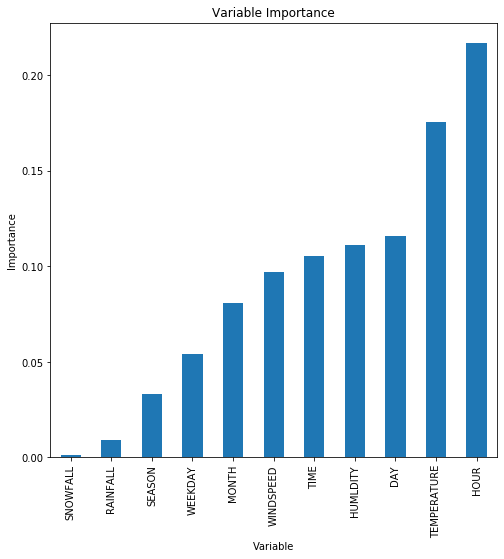

In [230]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=test_data.columns)
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.bar()
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Variable Importance')
plt.show()